# Linear Regression with Continuous

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [5]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100,1,1,1,0.066507
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200,0,0,0,0.075819


In [6]:
dataset.shape

(1170, 10)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
target = dataset['Adj Close']
features = dataset[['Open']]

In [9]:
model_lr = LinearRegression()

In [10]:
model_lr.fit(X=features, y=target)




LinearRegression()

In [11]:
features


,Open
Date,
2014-01-03,3.980000
2014-01-06,4.010000
2014-01-07,4.190000
2014-01-08,4.230000
2014-01-09,4.200000
...,...
2018-08-20,19.790001
2018-08-21,19.980000
2018-08-22,20.280001


In [12]:
model_lr.predict(X=features)

array([ 3.98127966,  4.01128168,  4.19129234, ..., 20.28226164,
       21.19231627, 22.91241914])

In [13]:
dataset['pred_lr'] = model_lr.predict(X=features)
dataset


,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,pred_lr
Date,,,,,,,,,,,
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658,3.981280
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500,4.011282
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,0,0.012106,4.191292
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,0,0,0.000000,4.231295
2014-01-09,4.200000,4.23,4.050000,4.090000,4.090000,30667600,0,0,1,-0.021531,4.201293
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622,19.792232
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021,19.982242
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510,20.282262


<AxesSubplot:xlabel='Open', ylabel='Adj Close'>

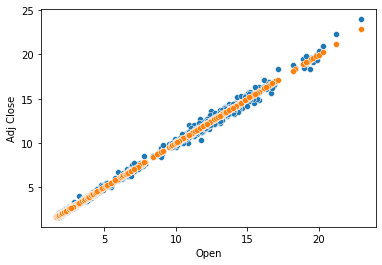

In [14]:
sns.scatterplot(x='Open', y='Adj Close', data=dataset)
sns.scatterplot(x='Open', y='pred_lr', data=dataset)

<AxesSubplot:xlabel='Open', ylabel='Adj Close'>

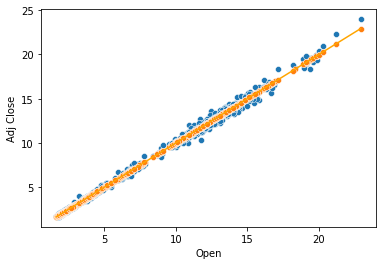

In [15]:
sns.scatterplot(x='Open', y='Adj Close', data=dataset)
sns.scatterplot(x='Open', y='pred_lr', data=dataset)
sns.lineplot(x='Open', y='pred_lr', data=dataset, color='orange')

In [16]:
model_lr.score(X=features, y=target)

0.997658173314538

In [17]:
dataset['Adj Close'] - dataset['pred_lr']

Date
2014-01-03    0.018720
2014-01-06    0.118718
2014-01-07   -0.011293
2014-01-08   -0.051295
2014-01-09   -0.111293
                ...   
2018-08-20    0.187767
2018-08-21    0.417757
2018-08-22    0.617738
2018-08-23    1.097685
2018-08-24    1.067580
Length: 1170, dtype: float64

In [18]:
dataset['residuals'] = dataset['Open'] - dataset['pred_lr']
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,pred_lr,residuals
Date,,,,,,,,,,,,
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658,3.981280,-0.001280
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500,4.011282,-0.001281
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,0,0.012106,4.191292,-0.001292
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,0,0,0.000000,4.231295,-0.001295
2014-01-09,4.200000,4.23,4.050000,4.090000,4.090000,30667600,0,0,1,-0.021531,4.201293,-0.001293
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622,19.792232,-0.002231
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021,19.982242,-0.002243
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510,20.282262,-0.002261


In [19]:
dataset.residuals.sum()

-1.7099978923797408

In [20]:
dataset.residuals.sum().round(2)

-1.71

In [21]:
dataset['residuals^2'] = dataset.residuals**2
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,pred_lr,residuals,residuals^2
Date,,,,,,,,,,,,,
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658,3.981280,-0.001280,0.000002
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500,4.011282,-0.001281,0.000002
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,0,0.012106,4.191292,-0.001292,0.000002
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,0,0,0.000000,4.231295,-0.001295,0.000002
2014-01-09,4.200000,4.23,4.050000,4.090000,4.090000,30667600,0,0,1,-0.021531,4.201293,-0.001293,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622,19.792232,-0.002231,0.000005
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021,19.982242,-0.002243,0.000005
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510,20.282262,-0.002261,0.000005


In [22]:
dataset['residuals^2'].sum()

0.0025991192921877267

In [23]:
RSS = dataset['residuals^2'].sum()
RSS

0.0025991192921877267

In [24]:
dataset.Open

Date
2014-01-03     3.980000
2014-01-06     4.010000
2014-01-07     4.190000
2014-01-08     4.230000
2014-01-09     4.200000
                ...    
2018-08-20    19.790001
2018-08-21    19.980000
2018-08-22    20.280001
2018-08-23    21.190001
2018-08-24    22.910000
Name: Open, Length: 1170, dtype: float64

In [25]:
dataset.Open.mean()

7.001341878145169

In [26]:
dataset.Open - dataset.Open.mean()

Date
2014-01-03    -3.021342
2014-01-06    -2.991342
2014-01-07    -2.811342
2014-01-08    -2.771342
2014-01-09    -2.801342
                ...    
2018-08-20    12.788659
2018-08-21    12.978658
2018-08-22    13.278659
2018-08-23    14.188659
2018-08-24    15.908658
Name: Open, Length: 1170, dtype: float64

In [27]:
dataset['real_residuals'] = dataset.Open - dataset.Open.mean()
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,pred_lr,residuals,residuals^2,real_residuals
Date,,,,,,,,,,,,,,
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658,3.981280,-0.001280,0.000002,-3.021342
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500,4.011282,-0.001281,0.000002,-2.991342
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,0,0.012106,4.191292,-0.001292,0.000002,-2.811342
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,0,0,0.000000,4.231295,-0.001295,0.000002,-2.771342
2014-01-09,4.200000,4.23,4.050000,4.090000,4.090000,30667600,0,0,1,-0.021531,4.201293,-0.001293,0.000002,-2.801342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622,19.792232,-0.002231,0.000005,12.788659
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021,19.982242,-0.002243,0.000005,12.978658
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510,20.282262,-0.002261,0.000005,13.278659


In [28]:
dataset['real_residuals^2'] = dataset.real_residuals**2

In [29]:
dataset['real_residuals^2'].sum()

27561.564995489553

In [30]:
TSS = dataset['real_residuals^2'].sum()
TSS

27561.564995489553

In [31]:
RSS/TSS

9.430231166528723e-08

9.43e-08 is the badness of the model as RSS represents the residuals (errors) of the model.

In [32]:
1 - RSS/TSS

0.9999999056976884

99.99% of the total number of Open variability.

In [33]:
model_lr.score(X=features, y=target)

0.997658173314538

In [34]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([1.0000602]),
 '_residues': 64.70370505064436,
 'rank_': 1,
 'singular_': array([166.01676119]),
 'intercept_': 0.0010400337902405354}